In [3]:
import sqlite3
import pandas as pd

In [7]:
# Load the cleaned CSV data into a Pandas DataFrame
csv_file_path = 'EnergyWorldDevelopmentIndicators_Data_cleaned.csv'
df = pd.read_csv(csv_file_path)

In [9]:
# Create SQLite database and establish connection
conn = sqlite3.connect('energy_world_development.db')
c = conn.cursor()

In [11]:
# Create a table for the dataset
c.execute('''
CREATE TABLE IF NOT EXISTS energy_data (
    country_name TEXT,
    country_code TEXT,
    series_name TEXT,
    series_code TEXT,
    year_2000 REAL, year_2001 REAL, year_2002 REAL, year_2003 REAL, year_2004 REAL,
    year_2005 REAL, year_2006 REAL, year_2007 REAL, year_2008 REAL, year_2009 REAL,
    year_2010 REAL, year_2011 REAL, year_2012 REAL, year_2013 REAL, year_2014 REAL,
    year_2015 REAL, year_2016 REAL, year_2017 REAL, year_2018 REAL, year_2019 REAL,
    year_2020 REAL, year_2021 REAL, year_2022 REAL
)
''')

In [13]:
# Insert data into the table
df.to_sql('energy_data', conn, if_exists='replace', index=False)

5059

In [15]:
# Commit and close the connection
conn.commit()

In [17]:
# Query all records
c.execute("SELECT * FROM energy_data")
rows = c.fetchall()
for row in rows[:5]:  # Displaying only the first 5 records for brevity
    print(row)

('Afghanistan', 'AFG', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 4.4, 9.3, 14.1, 19.0, 23.8, 28.7, 33.5, 38.4, 42.4, 48.3, 42.7, 43.2, 69.1, 68.0, 89.5, 71.5, 97.7, 97.7, 93.4, 97.7, 97.7, 97.7, 85.3)
('Afghanistan', 'AFG', 'Access to electricity, rural (% of rural population)', 'EG.ELC.ACCS.RU.ZS', 0.0, 0.0, 0.0, 2.1, 7.8, 15.4, 19.3, 25.0, 28.0, 36.7, 30.2, 29.6, 60.8, 60.2, 86.5, 64.6, 97.1, 97.1, 91.6, 97.1, 97.1, 97.1, 81.7)
('Afghanistan', 'AFG', 'Access to electricity, urban (% of urban population)', 'EG.ELC.ACCS.UR.ZS', 73.4, 74.8, 76.1, 77.5, 78.8, 74.0, 81.6, 83.0, 89.9, 85.9, 82.8, 86.6, 95.0, 92.2, 98.7, 92.5, 99.5, 99.5, 98.8, 99.5, 99.5, 99.5, 95.9)
('Afghanistan', 'AFG', 'Alternative and nuclear energy (% of total energy use)', 'EG.USE.COMM.CL.ZS', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
('Afghanistan', 'AFG', 'CO2 intensity (kg per kg of oil equivalent energy use)', 'EN.ATM.CO2

In [21]:
# Create SQLite database and establish connection
conn = sqlite3.connect('energy_world_development.db')
c = conn.cursor()

# Adjusted table creation with underscore in column names instead of spaces
c.execute('''
CREATE TABLE IF NOT EXISTS energy_data (
    country_name TEXT,
    country_code TEXT,
    series_name TEXT,
    series_code TEXT,
    year_2000 REAL, year_2001 REAL, year_2002 REAL, year_2003 REAL, year_2004 REAL,
    year_2005 REAL, year_2006 REAL, year_2007 REAL, year_2008 REAL, year_2009 REAL,
    year_2010 REAL, year_2011 REAL, year_2012 REAL, year_2013 REAL, year_2014 REAL,
    year_2015 REAL, year_2016 REAL, year_2017 REAL, year_2018 REAL, year_2019 REAL,
    year_2020 REAL, year_2021 REAL, year_2022 REAL
)
''')

# Insert the data into the table (with column names adjusted for underscores)
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.to_sql('energy_data', conn, if_exists='replace', index=False)

# Commit and close the connection
conn.commit()


In [23]:
# Query for unique series names
c.execute("SELECT DISTINCT series_name FROM energy_data")
unique_series = c.fetchall()
for series in unique_series:
    print(series)

('Access to electricity (% of population)',)
('Access to electricity, rural (% of rural population)',)
('Access to electricity, urban (% of urban population)',)
('Alternative and nuclear energy (% of total energy use)',)
('CO2 intensity (kg per kg of oil equivalent energy use)',)
('Combustible renewables and waste (% of total energy)',)
('Energy imports, net (% of energy use)',)
('Energy related methane emissions (% of total)',)
('Energy use (kg of oil equivalent per capita)',)
('Energy use (kg of oil equivalent) per $1,000 GDP (constant 2021 PPP)',)
('Fossil fuel energy consumption (% of total)',)
('GDP per unit of energy use (constant 2021 PPP $ per kg of oil equivalent)',)
('GDP per unit of energy use (PPP $ per kg of oil equivalent)',)
('Investment in energy with private participation (current US$)',)
('Methane emissions in energy sector (thousand metric tons of CO2 equivalent)',)
('Nitrous oxide emissions in energy sector (% of total)',)
('Nitrous oxide emissions in energy sector 

In [25]:
# Delete records for Afghanistan from the energy_data table
c.execute("DELETE FROM energy_data WHERE country_name = 'Afghanistan'")
conn.commit()

In [27]:
# Verify deletion
c.execute("SELECT * FROM energy_data WHERE country_name = 'Afghanistan'")
rows = c.fetchall()
print("Records after deletion:", rows)

Records after deletion: []


In [29]:
# Find records where the series_name is 'Access to electricity (% of population)'
c.execute("SELECT * FROM energy_data WHERE series_name = 'Access to electricity (% of population)'")
access_electricity = c.fetchall()
for row in access_electricity[:5]:
    print(row)

('Albania', 'ALB', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 100.0, 99.6, 99.6, 99.7, 99.9, 99.9, 100.0, 100.0, 99.9, 99.9, 100.0, 100.0, 100.0, 100.0, 100.0)
('Algeria', 'DZA', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 98.6, 98.6, 98.6, 98.6, 98.6, 98.6, 98.7, 98.7, 99.3, 98.8, 98.9, 99.0, 98.8, 99.2, 99.3, 99.4, 99.4, 99.5, 99.6, 99.5, 99.7, 99.8, 100.0)
('American Samoa', 'ASM', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
('Andorra', 'AND', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0)
('Angola', 'AGO', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 24.2, 20.0, 26.3, 27.4, 28.4, 29.

In [33]:
# Display the column names in the DataFrame
print(df.columns)

Index(['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')


In [35]:
# Clean up column names to remove spaces and special characters
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '').str.lower()

# Verify the updated column names
print(df.columns)

Index(['country_name', 'country_code', 'series_name', 'series_code', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')


In [37]:
# Create SQLite database and establish connection
conn = sqlite3.connect('energy_world_development.db')
c = conn.cursor()

# Create a table with cleaned column names
c.execute('''
CREATE TABLE IF NOT EXISTS energy_data (
    country_name TEXT,
    country_code TEXT,
    series_name TEXT,
    series_code TEXT,
    year_2000 REAL, year_2001 REAL, year_2002 REAL, year_2003 REAL, year_2004 REAL,
    year_2005 REAL, year_2006 REAL, year_2007 REAL, year_2008 REAL, year_2009 REAL,
    year_2010 REAL, year_2011 REAL, year_2012 REAL, year_2013 REAL, year_2014 REAL,
    year_2015 REAL, year_2016 REAL, year_2017 REAL, year_2018 REAL, year_2019 REAL,
    year_2020 REAL, year_2021 REAL, year_2022 REAL
)
''')

# Insert the cleaned-up data into the table
df.to_sql('energy_data', conn, if_exists='replace', index=False)

# Commit and close the connection
conn.commit()


In [41]:
c.execute("SELECT * FROM energy_data")
rows = c.fetchall()
for row in rows[:5]:  # Displaying only the first 5 records for brevity
    print(row)

('Afghanistan', 'AFG', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 4.4, 9.3, 14.1, 19.0, 23.8, 28.7, 33.5, 38.4, 42.4, 48.3, 42.7, 43.2, 69.1, 68.0, 89.5, 71.5, 97.7, 97.7, 93.4, 97.7, 97.7, 97.7, 85.3)
('Afghanistan', 'AFG', 'Access to electricity, rural (% of rural population)', 'EG.ELC.ACCS.RU.ZS', 0.0, 0.0, 0.0, 2.1, 7.8, 15.4, 19.3, 25.0, 28.0, 36.7, 30.2, 29.6, 60.8, 60.2, 86.5, 64.6, 97.1, 97.1, 91.6, 97.1, 97.1, 97.1, 81.7)
('Afghanistan', 'AFG', 'Access to electricity, urban (% of urban population)', 'EG.ELC.ACCS.UR.ZS', 73.4, 74.8, 76.1, 77.5, 78.8, 74.0, 81.6, 83.0, 89.9, 85.9, 82.8, 86.6, 95.0, 92.2, 98.7, 92.5, 99.5, 99.5, 98.8, 99.5, 99.5, 99.5, 95.9)
('Afghanistan', 'AFG', 'Alternative and nuclear energy (% of total energy use)', 'EG.USE.COMM.CL.ZS', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
('Afghanistan', 'AFG', 'CO2 intensity (kg per kg of oil equivalent energy use)', 'EN.ATM.CO2

In [43]:
c.execute("SELECT DISTINCT series_name FROM energy_data")
unique_series = c.fetchall()
for series in unique_series:
    print(series)

('Access to electricity (% of population)',)
('Access to electricity, rural (% of rural population)',)
('Access to electricity, urban (% of urban population)',)
('Alternative and nuclear energy (% of total energy use)',)
('CO2 intensity (kg per kg of oil equivalent energy use)',)
('Combustible renewables and waste (% of total energy)',)
('Energy imports, net (% of energy use)',)
('Energy related methane emissions (% of total)',)
('Energy use (kg of oil equivalent per capita)',)
('Energy use (kg of oil equivalent) per $1,000 GDP (constant 2021 PPP)',)
('Fossil fuel energy consumption (% of total)',)
('GDP per unit of energy use (constant 2021 PPP $ per kg of oil equivalent)',)
('GDP per unit of energy use (PPP $ per kg of oil equivalent)',)
('Investment in energy with private participation (current US$)',)
('Methane emissions in energy sector (thousand metric tons of CO2 equivalent)',)
('Nitrous oxide emissions in energy sector (% of total)',)
('Nitrous oxide emissions in energy sector 

In [45]:
c.execute("SELECT * FROM energy_data WHERE series_name = 'Access to electricity (% of population)'")
access_electricity = c.fetchall()
for row in access_electricity[:5]:
    print(row)

('Afghanistan', 'AFG', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 4.4, 9.3, 14.1, 19.0, 23.8, 28.7, 33.5, 38.4, 42.4, 48.3, 42.7, 43.2, 69.1, 68.0, 89.5, 71.5, 97.7, 97.7, 93.4, 97.7, 97.7, 97.7, 85.3)
('Albania', 'ALB', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 100.0, 99.6, 99.6, 99.7, 99.9, 99.9, 100.0, 100.0, 99.9, 99.9, 100.0, 100.0, 100.0, 100.0, 100.0)
('Algeria', 'DZA', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 98.6, 98.6, 98.6, 98.6, 98.6, 98.6, 98.7, 98.7, 99.3, 98.8, 98.9, 99.0, 98.8, 99.2, 99.3, 99.4, 99.4, 99.5, 99.6, 99.5, 99.7, 99.8, 100.0)
('American Samoa', 'ASM', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
('Andorra', 'AND', 'Access to electricity (% of population)', 'EG.ELC.ACCS.ZS', 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.

In [57]:
# Query records where values are between 10% and 50% for the 'Access to electricity' series between 2010 and 2020
c.execute("""
SELECT country_name, series_name, 2010, 2020
FROM energy_data
WHERE 2010 BETWEEN 10 AND 50 AND 2020 BETWEEN 10 AND 50
""")
filtered_data = c.fetchall()
for row in filtered_data:
    print(row)

In [59]:
# Read data from SQL query into Pandas DataFrame
query = "SELECT country_name, series_name, 2020 FROM energy_data"
df_sql = pd.read_sql_query(query, conn)

# Display the DataFrame
print(df_sql.head())

  country_name                                        series_name  2020
0  Afghanistan            Access to electricity (% of population)  2020
1  Afghanistan  Access to electricity, rural (% of rural popul...  2020
2  Afghanistan  Access to electricity, urban (% of urban popul...  2020
3  Afghanistan  Alternative and nuclear energy (% of total ene...  2020
4  Afghanistan  CO2 intensity (kg per kg of oil equivalent ene...  2020


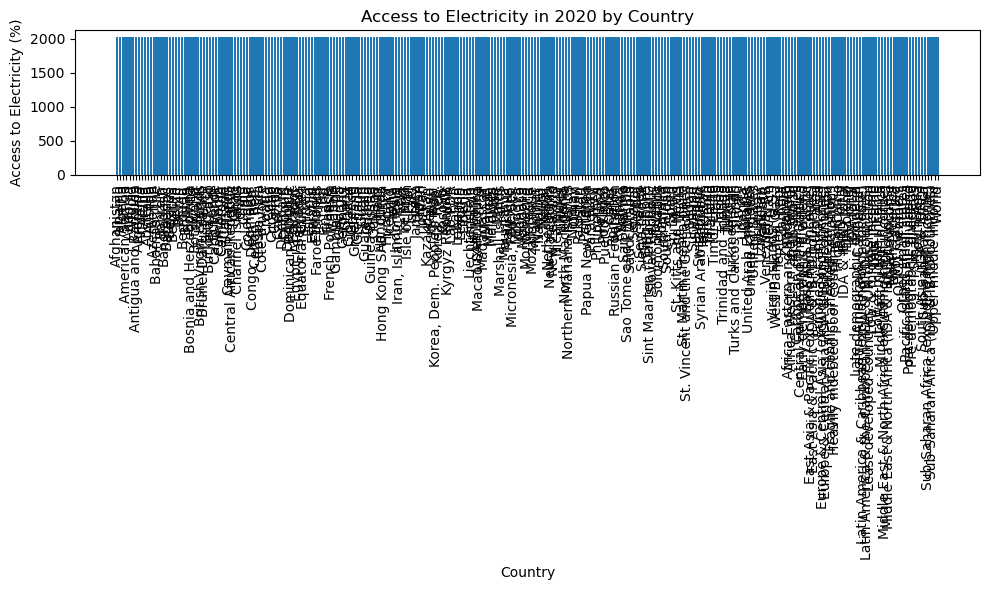

In [61]:
import matplotlib.pyplot as plt

# Query the average access to electricity in 2020
c.execute("""
SELECT country_name, 2020
FROM energy_data
WHERE series_name = 'Access to electricity (% of population)'
""")
data_2020 = c.fetchall()

# Prepare the data for visualization
countries = [item[0] for item in data_2020]
access_2020 = [item[1] for item in data_2020]

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(countries, access_2020)
plt.xlabel('Country')
plt.ylabel('Access to Electricity (%)')
plt.title('Access to Electricity in 2020 by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
